In [1]:
# Blog : Part 1 - https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-1
# Blog : Part 2 - https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-2

In [2]:
### PART 1

In [3]:
### Importing Data

In [4]:
# import pandas and sqlite3
import pandas as pd
import sqlite3

# Connecting to SQLite Database
conn = sqlite3.connect('lahman2016.sqlite')

In [5]:
# Querying Database for all seasons where a team played 150 or more games
# and is still active today.
query = '''
select * from Teams
inner join TeamsFranchises
on Teams.franchID == TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active == 'Y';
'''

# Creating dataframe from query.
Teams = conn.execute(query).fetchall()

In [6]:
# Convert Teams to DataFrame
teams_df = pd.DataFrame(Teams)

# print out first 5 rows
print(teams_df.head())

     0   1    2    3     4   5    6     7   8   9   ...       42   43   44  \
0  1961  AL  LAA  ANA  None   8  162  82.0  70  91  ...   603510  111  112   
1  1962  AL  LAA  ANA  None   3  162  81.0  86  76  ...  1144063   97   97   
2  1963  AL  LAA  ANA  None   9  161  81.0  70  91  ...   821015   94   94   
3  1964  AL  LAA  ANA  None   5  162  81.0  82  80  ...   760439   90   90   
4  1965  AL  CAL  ANA  None   7  162  80.0  75  87  ...   566727   97   98   

    45   46   47   48                             49  50    51  
0  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
1  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
2  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
3  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
4  CAL  CAL  CAL  ANA  Los Angeles Angels of Anaheim   Y  None  

[5 rows x 52 columns]


In [7]:
### Cleaning and Preparing The Data

In [8]:
# Adding column names to dataframe
cols = ['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']
teams_df.columns = cols

# Print the first rows of 'teams_df'
print(teams_df.head())

# Print the length of 'teams_df'
print(len(teams_df))

   yearID lgID teamID  franchID divID  Rank    G  Ghome   W   L  ...  \
0    1961   AL    LAA       ANA  None     8  162   82.0  70  91  ...   
1    1962   AL    LAA       ANA  None     3  162   81.0  86  76  ...   
2    1963   AL    LAA       ANA  None     9  161   81.0  70  91  ...   
3    1964   AL    LAA       ANA  None     5  162   81.0  82  80  ...   
4    1965   AL    CAL       ANA  None     7  162   80.0  75  87  ...   

  attendance  BPF  PPF teamIDBR  teamIDlahman45  teamIDretro  franchID  \
0     603510  111  112      LAA             LAA          LAA       ANA   
1    1144063   97   97      LAA             LAA          LAA       ANA   
2     821015   94   94      LAA             LAA          LAA       ANA   
3     760439   90   90      LAA             LAA          LAA       ANA   
4     566727   97   98      CAL             CAL          CAL       ANA   

                      franchName  active  NAassoc  
0  Los Angeles Angels of Anaheim       Y     None  
1  Los Angeles Ang

In [9]:
# Dropping you unnecessary column variables
drop_cols = ['lgID','franchID','divID','Rank','Ghome','L','DivWin','WCWin','LgWin','WSWin','SF','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']

df = teams_df.drop(drop_cols, axis = 1)

# Print out first rows of 'df'
print(df.head())

   yearID teamID    G   W    R    AB     H   2B  3B   HR  ...  SHO  SV  \
0    1961    LAA  162  70  744  5424  1331  218  22  189  ...    5  34   
1    1962    LAA  162  86  718  5499  1377  232  35  137  ...   15  47   
2    1963    LAA  161  70  597  5506  1378  208  38   95  ...   13  31   
3    1964    LAA  162  82  544  5362  1297  186  27  102  ...   28  41   
4    1965    CAL  162  75  527  5354  1279  200  36   92  ...   14  33   

   IPouts    HA  HRA  BBA  SOA    E     DP     FP  
0    4314  1391  180  713  973  192  154.0  0.969  
1    4398  1412  118  616  858  175  153.0  0.972  
2    4365  1317  120  578  889  163  155.0  0.974  
3    4350  1273  100  530  965  138  168.0  0.978  
4    4323  1259   91  563  847  123  149.0  0.981  

[5 rows x 29 columns]


In [10]:
# Print out null values of all columns of 'df'
print(df.isnull().sum(axis = 0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 419, 1777, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0]


In [11]:
# Eliminating columns with null values
df = df.drop(['CS', 'HBP'], axis = 1)

# Filling null values
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())

# Print out null values of all columns of 'df'
print(df.isnull().sum(axis = 0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
### Exploring and Visualizing The Data

Text(0.5, 1.0, 'Distribution of Wins')

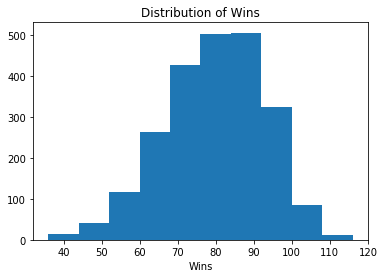

In [13]:
# import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# matplotlib plots inline
%matplotlib inline

# Plotting distribution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

In [14]:
print(df['W'].mean())

79.23043288150416


In [15]:
# Creating bins for the win column
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <=69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5

# Apply 'assign_win_bins' to df['W']
df['win_bins'] = df['W'].apply(assign_win_bins)

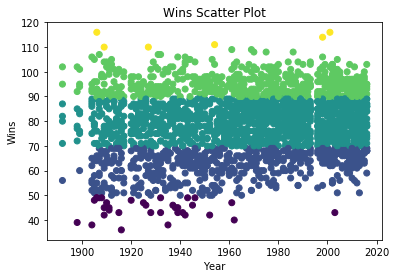

In [16]:
# Plotting scatter graph of Year vs. Wins
plt.scatter(df['yearID'], df['W'], c = df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

In [17]:
# Filter for rows where 'yearID' is greater than 1900
df = df[df['yearID'] > 1900]

In [18]:
# Create runs per year and games per year dictionaries
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games

print(runs_per_year)
print(games_per_year)

{1961: 12942, 1962: 14461, 1963: 12780, 1964: 13124, 1965: 12946, 1966: 12900, 1967: 12210, 1968: 11109, 1969: 15850, 1970: 16880, 1971: 15073, 1972: 13706, 1973: 16376, 1974: 16046, 1975: 16295, 1976: 15492, 1977: 18803, 1978: 17251, 1979: 18713, 1980: 18053, 1982: 18110, 1983: 18170, 1984: 17921, 1985: 18216, 1986: 18545, 1987: 19883, 1988: 17380, 1989: 17405, 1990: 17919, 1991: 18127, 1992: 17341, 1993: 20864, 1996: 22831, 1997: 21604, 1998: 23297, 1999: 24691, 2000: 24971, 2001: 23199, 2002: 22408, 2003: 22978, 2004: 23376, 2005: 22325, 2006: 23599, 2007: 23322, 2008: 22585, 2009: 22419, 2010: 21308, 2011: 20808, 2012: 21017, 2013: 20255, 2014: 19761, 2015: 20647, 2016: 21744, 1904: 9307, 1905: 9640, 1906: 8322, 1907: 8186, 1908: 8423, 1909: 8805, 1910: 9580, 1911: 11164, 1912: 11154, 1913: 9964, 1914: 9408, 1915: 9444, 1916: 8889, 1917: 8948, 1920: 10762, 1921: 11935, 1922: 12059, 1923: 11874, 1924: 11722, 1925: 12596, 1926: 11443, 1927: 11745, 1928: 11645, 1929: 12747, 1930: 1369

In [19]:
# Create MLB runs per game (per year) dictionary
mlb_runs_per_game = {}
for k, v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games

print(mlb_runs_per_game)

{1961: 4.525174825174825, 1962: 4.460518198642813, 1963: 3.9468807906114884, 1964: 4.035670356703567, 1965: 3.9882932840418976, 1966: 3.9938080495356036, 1967: 3.7685185185185186, 1968: 3.4181538461538463, 1969: 4.07245632065776, 1970: 4.341563786008231, 1971: 3.8888028895768834, 1972: 3.6863905325443787, 1973: 4.214101904271745, 1974: 4.124935732647815, 1975: 4.21277145811789, 1976: 3.99484270242393, 1977: 4.470518307180218, 1978: 4.103472882968601, 1979: 4.457598856598381, 1980: 4.2881235154394295, 1982: 4.297579496915045, 1983: 4.307728781412992, 1984: 4.256769596199525, 1985: 4.330955777460771, 1986: 4.409177365668093, 1987: 4.722802850356294, 1988: 4.1380952380952385, 1989: 4.132241215574549, 1990: 4.256294536817102, 1991: 4.307747148288973, 1992: 4.1170465337132, 1993: 4.597620096959012, 1996: 5.0355094838994265, 1997: 4.766990291262136, 1998: 4.789679276315789, 1999: 5.0846375617792425, 2000: 5.140181144503911, 2001: 4.7754219843557015, 2002: 4.6183017312448476, 2003: 4.72798353

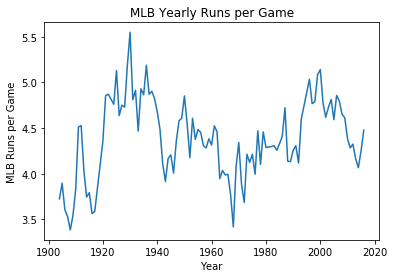

In [20]:
# Create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

# Create line plot of Year vs. MLB runs per Game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')

plt.show()

In [21]:
### Adding New Features

In [22]:
# Creating 'year_label' column, which will give your algorithm
# information about how certain years are related
# (Dead ball eras, Live ball/Steroid Eras)

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8

# Add year_label column to df
df['year_label'] = df['yearID'].apply(assign_label)

dummy_df = pd.get_dummies(df['year_label'], prefix = 'era')

# Concatenate df and dummy_df
df = pd.concat([df, dummy_df], axis = 1)

print(df.head())

   yearID teamID    G   W    R    AB     H   2B  3B   HR  ...  win_bins  \
0    1961    LAA  162  70  744  5424  1331  218  22  189  ...         3   
1    1962    LAA  162  86  718  5499  1377  232  35  137  ...         3   
2    1963    LAA  161  70  597  5506  1378  208  38   95  ...         3   
3    1964    LAA  162  82  544  5362  1297  186  27  102  ...         3   
4    1965    CAL  162  75  527  5354  1279  200  36   92  ...         3   

   year_label  era_1  era_2  era_3  era_4  era_5  era_6  era_7  era_8  
0           4      0      0      0      1      0      0      0      0  
1           4      0      0      0      1      0      0      0      0  
2           5      0      0      0      0      1      0      0      0  
3           5      0      0      0      0      1      0      0      0  
4           5      0      0      0      0      1      0      0      0  

[5 rows x 37 columns]


In [23]:
# Create column for MLB runs per game from the mlb_runs_per_game
# dictionary
def assign_mlb_rpg(year):
    return mlb_runs_per_game[year]

df['mlb_rpg'] = df['yearID'].apply(assign_mlb_rpg)

In [24]:
# Convert years into decade bins and creating dummy variables
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010

df['decade_label'] = df['yearID'].apply(assign_decade)
decade_df = pd.get_dummies(df['decade_label'], prefix = 'decade')
df = pd.concat([df, decade_df], axis = 1)

# Drop unnecessary columns
df = df.drop(['yearID', 'year_label', 'decade_label'], axis = 1)

In [25]:
# Create new features for Runs per Game and Runs Allowed per Game
df['R_per_game'] = df['R'] / df['G']
df['RA_per_game'] = df['RA'] / df['G']

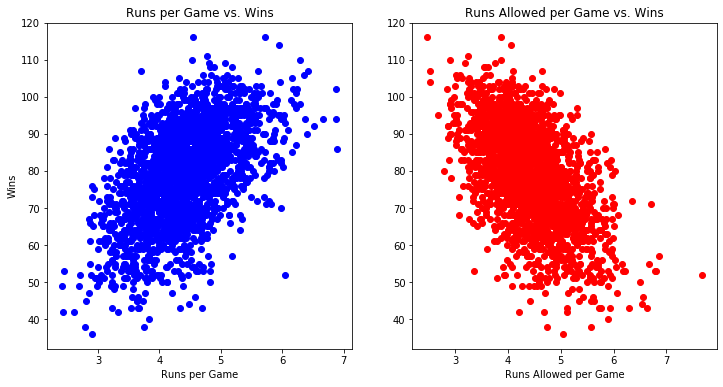

In [26]:
# Create scatter plots for runs per game vs wins and runs allowed
# per game vs. wins
fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.scatter(df['R_per_game'], df['W'], c = 'blue')
ax1.set_title('Runs per Game vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(df['RA_per_game'], df['W'], c = 'red')
ax2.set_title('Runs Allowed per Game vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

In [27]:
# Correlation
df.corr()['W']

G              0.178958
W              1.000000
R              0.551504
AB             0.233996
H              0.380281
2B             0.262323
3B             0.016970
HR             0.312713
BB             0.345348
SO             0.072069
SB             0.133300
RA            -0.518313
ER            -0.372580
ERA           -0.425833
CG            -0.041788
SHO            0.426892
SV             0.382174
IPouts         0.326087
HA            -0.384893
HRA            0.009880
BBA           -0.284782
SOA            0.259205
E             -0.304725
DP             0.015192
FP             0.319597
win_bins       0.912545
era_1         -0.077104
era_2         -0.083089
era_3         -0.033073
era_4         -0.052278
era_5          0.042122
era_6          0.058439
era_7          0.066049
era_8          0.043453
mlb_rpg        0.006909
decade_1910   -0.077104
decade_1920   -0.055176
decade_1930   -0.052358
decade_1940   -0.050249
decade_1950   -0.047499
decade_1960    0.028594
decade_1970    0

In [28]:
# KMeans
attributes = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG',
'SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6','era_7','era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960','decade_1970','decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game','mlb_rpg']


data_attributes = df[attributes]

# Print the first rows of 'df'
print(df.head())

  teamID    G   W    R    AB     H   2B  3B   HR   BB  ...  decade_1940  \
0    LAA  162  70  744  5424  1331  218  22  189  681  ...            0   
1    LAA  162  86  718  5499  1377  232  35  137  602  ...            0   
2    LAA  161  70  597  5506  1378  208  38   95  448  ...            0   
3    LAA  162  82  544  5362  1297  186  27  102  472  ...            0   
4    CAL  162  75  527  5354  1279  200  36   92  443  ...            0   

   decade_1950  decade_1960  decade_1970  decade_1980  decade_1990  \
0            0            1            0            0            0   
1            0            1            0            0            0   
2            0            1            0            0            0   
3            0            1            0            0            0   
4            0            1            0            0            0   

   decade_2000  decade_2010  R_per_game  RA_per_game  
0            0            0    4.592593     4.839506  
1            0    

In [29]:
# Import necessary modules from 'sklearn'
from sklearn.cluster import KMeans
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2, 11):
    km = KMeans(n_clusters = i, random_state = 1)
    l = km.fit_predict(data_attributes)
    s_s = metrics.silhouette_score(data_attributes, l)
    s_score_dict[i] = [s_s]

# Print out 's_score_dict'
print(s_score_dict)

{2: [0.3906998802293878], 3: [0.3380758548481093], 4: [0.25340940061017997], 5: [0.23561577404187492], 6: [0.2138869412081822], 7: [0.19570350588885865], 8: [0.1866085747852742], 9: [0.1735454878870926], 10: [0.16986446409819547]}


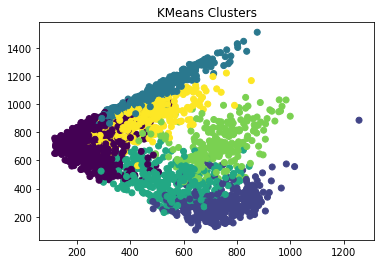

In [30]:
# Create K-Means model and determine euclidian distances for each data point
kmeans_model = KMeans(n_clusters = 6, random_state = 1)
distances = kmeans_model.fit_transform(data_attributes)

# Create scatter plot using labels from K-Means model as color
labels = kmeans_model.labels_

plt.scatter(distances[:, 0], distances[:, 1], c = labels)
plt.title('KMeans Clusters')
plt.show()

In [31]:
# Add labels from K-Means model to 'df' DataFrame and attributes
# list
df['labels'] = labels
attributes.append('labels')

# Print the first rows of 'df'
print(df.head())

  teamID    G   W    R    AB     H   2B  3B   HR   BB  ...  decade_1950  \
0    LAA  162  70  744  5424  1331  218  22  189  681  ...            0   
1    LAA  162  86  718  5499  1377  232  35  137  602  ...            0   
2    LAA  161  70  597  5506  1378  208  38   95  448  ...            0   
3    LAA  162  82  544  5362  1297  186  27  102  472  ...            0   
4    CAL  162  75  527  5354  1279  200  36   92  443  ...            0   

   decade_1960  decade_1970  decade_1980  decade_1990  decade_2000  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            1            0            0            0            0   
3            1            0            0            0            0   
4            1            0            0            0            0   

   decade_2010  R_per_game  RA_per_game  labels  
0            0    4.592593     4.839506       5  
1            0    4.432099  

In [32]:
# Create new DataFrame using only variables to be included in models
numeric_cols = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6','era_7','era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960','decade_1970','decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game','mlb_rpg','labels','W']
data = df[numeric_cols]
print(data.head())

# Split data DataFrame into train and test sets
train = data.sample(frac = 0.75, random_state = 1)
test = data.loc[~data.index.isin(train.index)]

x_train = train[attributes]
y_train = train['W']
x_test = test[attributes]
y_test = test['W']

     G    R    AB     H   2B  3B   HR   BB      SO   SB  ...  decade_1970  \
0  162  744  5424  1331  218  22  189  681  1068.0   37  ...            0   
1  162  718  5499  1377  232  35  137  602   917.0   46  ...            0   
2  161  597  5506  1378  208  38   95  448   916.0   43  ...            0   
3  162  544  5362  1297  186  27  102  472   920.0   49  ...            0   
4  162  527  5354  1279  200  36   92  443   973.0  107  ...            0   

   decade_1980  decade_1990  decade_2000  decade_2010  R_per_game  \
0            0            0            0            0    4.592593   
1            0            0            0            0    4.432099   
2            0            0            0            0    3.708075   
3            0            0            0            0    3.358025   
4            0            0            0            0    3.253086   

   RA_per_game   mlb_rpg  labels   W  
0     4.839506  4.525175       5  70  
1     4.358025  4.460518       0  86  
2    

In [33]:
# Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Import mean_absolute error from sklearn.metrics
from sklearn.metrics import mean_absolute_error

# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

# Determine mean absolute error
mae = mean_absolute_error(y_test, predictions)

# Print mae
print(mae)

2.688790228995924


In [34]:
# Import 'RidgeCV' from 'sklearn.linear_model'
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas = (0.01, 0.1, 1.0, 10.0), normalize = True)
rrm.fit(x_train, y_train)
predictions_rrm = rrm.predict(x_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

2.672591874646265


In [1]:
### PART 2

In [2]:
# Import data to Dataframes
import pandas as pd

# Read the CSV files
master_df = pd.read_csv('Master.csv', usecols=['playerID','nameFirst','nameLast','bats','throws','debut','finalGame'])
fielding_df = pd.read_csv('Fielding.csv', usecols=['playerID','yearID','stint','teamID','lgID','POS','G','GS','InnOuts','PO','A','E','DP'])
batting_df = pd.read_csv('Batting.csv')
awards_df = pd.read_csv('AwardsPlayers.csv', usecols=['playerID','awardID','yearID'])
allstar_df = pd.read_csv('AllstarFull.csv', usecols=['playerID','yearID'])
hof_df = pd.read_csv('HallOfFame.csv', usecols=['playerID','yearid','votedBy','needed_note','inducted','category'])
appearances_df = pd.read_csv('Appearances.csv')

In [3]:
### Data Cleaning and Preprocessing

In [4]:
# Print first few rows of 'batting_df'
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Initialize dictionaires for player stats and years played
player_stats = {}
years_played = {}

# Create dictionaries for player stats and years played from 'batting_df'
for i, row in batting_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['G'] = player_stats[playerID]['G'] + row['G']
        player_stats[playerID]['AB'] = player_stats[playerID]['AB'] + row['AB']
        player_stats[playerID]['R'] = player_stats[playerID]['R'] + row['R']
        player_stats[playerID]['H'] = player_stats[playerID]['H'] + row['H']
        player_stats[playerID]['2B'] = player_stats[playerID]['2B'] + row['2B']
        player_stats[playerID]['3B'] = player_stats[playerID]['3B'] + row['3B']
        player_stats[playerID]['HR'] = player_stats[playerID]['HR'] + row['HR']
        player_stats[playerID]['RBI'] = player_stats[playerID]['RBI'] + row['RBI']
        player_stats[playerID]['SB'] = player_stats[playerID]['SB'] + row['SB']
        player_stats[playerID]['BB'] = player_stats[playerID]['BB'] + row['BB']
        player_stats[playerID]['SO'] = player_stats[playerID]['SO'] + row['SO']
        player_stats[playerID]['IBB'] = player_stats[playerID]['IBB'] + row['IBB']
        player_stats[playerID]['HBP'] = player_stats[playerID]['HBP'] + row['HBP']
        player_stats[playerID]['SH'] = player_stats[playerID]['SH'] + row['SH']
        player_stats[playerID]['SF'] = player_stats[playerID]['SF'] + row['SF']
        years_played[playerID].append(row['yearID'])
    else:
        player_stats[playerID] = {}
        player_stats[playerID]['G'] = row['G']
        player_stats[playerID]['AB'] = row['AB']
        player_stats[playerID]['R'] = row['R']
        player_stats[playerID]['H'] = row['H']
        player_stats[playerID]['2B'] = row['2B']
        player_stats[playerID]['3B'] = row['3B']
        player_stats[playerID]['HR'] = row['HR']
        player_stats[playerID]['RBI'] = row['RBI']
        player_stats[playerID]['SB'] = row['SB']
        player_stats[playerID]['BB'] = row['BB']
        player_stats[playerID]['SO'] = row['SO']
        player_stats[playerID]['IBB'] = row['IBB']
        player_stats[playerID]['HBP'] = row['HBP']
        player_stats[playerID]['SH'] = row['SH']
        player_stats[playerID]['SF'] = row['SF']
        years_played[playerID] = []
        years_played[playerID].append(row['yearID'])

In [6]:
# Iterate through 'years_played' and add the number of years played to 'player_stats'
for k, v in years_played.items():
    player_stats[k]['Years_Played'] = len(list(set(v)))

In [7]:
# Initialize 'fielder_list'
fielder_list = []

# Add fielding stats to `player_stats` from `fielding_df`
for i, row in fielding_df.iterrows():
    playerID = row['playerID']
    Gf = row['G']
    GSf = row['GS']
    POf = row['PO']
    Af = row['A']
    Ef = row['E']
    DPf = row['DP']
    if playerID in player_stats and playerID in fielder_list:
        player_stats[playerID]['Gf'] = player_stats[playerID]['Gf'] + Gf
        player_stats[playerID]['GSf'] = player_stats[playerID]['GSf'] + GSf
        player_stats[playerID]['POf'] = player_stats[playerID]['POf'] + POf
        player_stats[playerID]['Af'] = player_stats[playerID]['Af'] + Af
        player_stats[playerID]['Ef'] = player_stats[playerID]['Ef'] + Ef
        player_stats[playerID]['DPf'] = player_stats[playerID]['DPf'] + DPf
    else:
        fielder_list.append(playerID)
        player_stats[playerID]['Gf'] = Gf
        player_stats[playerID]['GSf'] = GSf
        player_stats[playerID]['POf'] = POf
        player_stats[playerID]['Af'] = Af
        player_stats[playerID]['Ef'] = Ef
        player_stats[playerID]['DPf'] = DPf

In [8]:
# Print out unique awards from 'awards_df'
print(awards_df['awardID'].unique())

['Pitching Triple Crown' 'Triple Crown' 'Baseball Magazine All-Star'
 'Most Valuable Player' 'TSN All-Star' 'TSN Guide MVP'
 'TSN Major League Player of the Year' 'TSN Pitcher of the Year'
 'TSN Player of the Year' 'Rookie of the Year' 'Babe Ruth Award'
 'Lou Gehrig Memorial Award' 'World Series MVP' 'Cy Young Award'
 'Gold Glove' 'TSN Fireman of the Year' 'All-Star Game MVP' 'Hutch Award'
 'Roberto Clemente Award' 'Rolaids Relief Man Award' 'NLCS MVP' 'ALCS MVP'
 'Silver Slugger' 'Branch Rickey Award' 'Hank Aaron Award'
 'TSN Reliever of the Year' 'Comeback Player of the Year'
 'Outstanding DH Award' 'Reliever of the Year Award']


In [9]:
# Create DataFrames for each award
mvp = awards_df[awards_df['awardID'] == 'Most Valuable Player']
roy = awards_df[awards_df['awardID'] == 'Rookie of the Year']
gg = awards_df[awards_df['awardID'] == 'Gold Glove']
ss = awards_df[awards_df['awardID'] == 'Silver Slugger']
ws_mvp = awards_df[awards_df['awardID'] == 'World Series MVP']

# Include each DataFrame in 'awards_list'
awards_list = [mvp, roy, gg, ss, ws_mvp]

# Initialize lists for each of the above DataFrames
mvp_list = []
roy_list = []
gg_list = []
ss_list = []
ws_mvp_list = []

# Include each of the above lists in lists
lists = [mvp_list, roy_list, gg_list, ss_list, ws_mvp_list]

# Add a count for each award for each player in 'player_stats'
for index, v in enumerate(awards_list):
    for i, row in v.iterrows():
        playerID = row['playerID']
        award = row['awardID']
        if playerID in player_stats and playerID in lists[index]:
            player_stats[playerID][award] += 1
        else:
            lists[index].append(playerID)
            player_stats[playerID][award] = 1

In [10]:
# Initialize 'allstar_list'
allstar_list = []

# Add a count of each Allstar game appearance for each player in player_stats
for i, row in allstar_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats and playerID in allstar_list:
        player_stats[playerID]['AS_games'] += 1
    else:
        allstar_list.append(playerID)
        player_stats[playerID]['AS_games'] = 1

In [11]:
# filter 'hot_df' to include only instances where player was inducted into the Hall of Fame
hof_df = hof_df[(hof_df['inducted'] == 'Y') & (hof_df['category'] == 'Player')]

# Indicate which players in 'player_stats' were inducted into the Hall of Fame
for i, row in hof_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['HoF'] = 1
        player_stats[playerID]['votedBy'] = row['votedBy']

In [12]:
# Convert 'player_stats' into a DataFrame
stats_df = pd.DataFrame.from_dict(player_stats, orient = 'index')

In [13]:
# Add a column for playerID from the 'stats_df' index
stats_df['playerID'] = stats_df.index

# Join 'stats_df' and 'master_df'
master_df = master_df.join(stats_df, on = 'playerID', how = 'inner', rsuffix = 'mstr')

# Inspect first rows of 'master_df'
master_df.head()

,playerID,nameFirst,nameLast,bats,throws,debut,finalGame,G,AB,R,...,DPf,HoF,votedBy,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,playerIDmstr
0,aardsda01,David,Aardsma,R,R,2004-04-06,2015-08-23,331,4,0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aardsda01
1,aaronha01,Hank,Aaron,R,R,1954-04-13,1976-10-03,3298,12364,2174,...,218.0,1.0,BBWAA,1.0,25.0,3.0,NaN,NaN,NaN,aaronha01
2,aaronto01,Tommie,Aaron,R,R,1962-04-10,1971-09-26,437,944,102,...,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aaronto01
3,aasedo01,Don,Aase,R,R,1977-07-26,1990-10-03,448,5,0,...,10.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,aasedo01
4,abadan01,Andy,Abad,L,L,2001-09-10,2006-04-13,15,21,1,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abadan01


In [14]:
print(appearances_df.head())

   yearID teamID lgID   playerID  G_all  GS  G_batting  G_defense  G_p  G_c  \
0    1871    TRO  NaN  abercda01      1 NaN          1          1    0    0   
1    1871    RC1  NaN   addybo01     25 NaN         25         25    0    0   
2    1871    CL1  NaN  allisar01     29 NaN         29         29    0    0   
3    1871    WS3  NaN  allisdo01     27 NaN         27         27    0   27   
4    1871    RC1  NaN  ansonca01     25 NaN         25         25    0    5   

   ...  G_2b  G_3b  G_ss  G_lf  G_cf  G_rf  G_of  G_dh  G_ph  G_pr  
0  ...     0     0     1     0     0     0     0   NaN   NaN   NaN  
1  ...    22     0     3     0     0     0     0   NaN   NaN   NaN  
2  ...     2     0     0     0    29     0    29   NaN   NaN   NaN  
3  ...     0     0     0     0     0     0     0   NaN   NaN   NaN  
4  ...     2    20     0     1     0     0     1   NaN   NaN   NaN  

[5 rows x 21 columns]


In [15]:
# Initialize a dictionary
pos_dict = {}


# Iterate through 'appearances_df'
# Add a count for the number of appearances for each player at each position
# Also add a count for the number of games played for each player in each era.
for i, row in appearances_df.iterrows():
    ID = row['playerID']
    year = row['yearID']
    if ID in pos_dict:
        pos_dict[ID]['G_all'] = pos_dict[ID]['G_all'] + row['G_all']
        pos_dict[ID]['G_p'] = pos_dict[ID]['G_p'] + row['G_p']
        pos_dict[ID]['G_c'] = pos_dict[ID]['G_c'] + row['G_c']
        pos_dict[ID]['G_1b'] = pos_dict[ID]['G_1b'] + row['G_1b']
        pos_dict[ID]['G_2b'] = pos_dict[ID]['G_2b'] + row['G_2b']
        pos_dict[ID]['G_3b'] = pos_dict[ID]['G_3b'] + row['G_3b']
        pos_dict[ID]['G_ss'] = pos_dict[ID]['G_ss'] + row['G_ss']
        pos_dict[ID]['G_lf'] = pos_dict[ID]['G_lf'] + row['G_lf']
        pos_dict[ID]['G_cf'] = pos_dict[ID]['G_cf'] + row['G_cf']
        pos_dict[ID]['G_rf'] = pos_dict[ID]['G_rf'] + row['G_rf']
        pos_dict[ID]['G_of'] = pos_dict[ID]['G_of'] + row['G_of']
        pos_dict[ID]['G_dh'] = pos_dict[ID]['G_dh'] + row['G_dh']
        if year < 1920:
            pos_dict[ID]['pre1920'] = pos_dict[ID]['pre1920'] + row['G_all']
        elif year >= 1920 and year <= 1941:
            pos_dict[ID]['1920-41'] = pos_dict[ID]['1920-41'] + row['G_all']
        elif year >= 1942 and year <= 1945:
            pos_dict[ID]['1942-45'] = pos_dict[ID]['1942-45'] + row['G_all']
        elif year >= 1946 and year <= 1962:
            pos_dict[ID]['1946-62'] = pos_dict[ID]['1946-62'] + row['G_all']
        elif year >= 1963 and year <= 1976:
            pos_dict[ID]['1963-76'] = pos_dict[ID]['1963-76'] + row['G_all']
        elif year >= 1977 and year <= 1992:
            pos_dict[ID]['1977-92'] = pos_dict[ID]['1977-92'] + row['G_all']
        elif year >= 1993 and year <= 2009:
            pos_dict[ID]['1993-2009'] = pos_dict[ID]['1993-2009'] + row['G_all']
        elif year > 2009:
            pos_dict[ID]['post2009'] = pos_dict[ID]['post2009'] + row['G_all']
    else:
        pos_dict[ID] = {}
        pos_dict[ID]['G_all'] = row['G_all']
        pos_dict[ID]['G_p'] = row['G_p']
        pos_dict[ID]['G_c'] = row['G_c']
        pos_dict[ID]['G_1b'] = row['G_1b']
        pos_dict[ID]['G_2b'] = row['G_2b']
        pos_dict[ID]['G_3b'] = row['G_3b']
        pos_dict[ID]['G_ss'] = row['G_ss']
        pos_dict[ID]['G_lf'] = row['G_lf']
        pos_dict[ID]['G_cf'] = row['G_cf']
        pos_dict[ID]['G_rf'] = row['G_rf']
        pos_dict[ID]['G_of'] = row['G_of']
        pos_dict[ID]['G_dh'] = row['G_dh']
        pos_dict[ID]['pre1920'] = 0
        pos_dict[ID]['1920-41'] = 0
        pos_dict[ID]['1942-45'] = 0
        pos_dict[ID]['1946-62'] = 0
        pos_dict[ID]['1963-76'] = 0
        pos_dict[ID]['1977-92'] = 0
        pos_dict[ID]['1993-2009'] = 0
        pos_dict[ID]['post2009'] = 0
        if year < 1920:
            pos_dict[ID]['pre1920'] = row['G_all']
        elif year >= 1920 and year <= 1941:
            pos_dict[ID]['1920-41'] = row['G_all']
        elif year >= 1942 and year <= 1945:
            pos_dict[ID]['1942-45'] = row['G_all']
        elif year >= 1946 and year <= 1962:
            pos_dict[ID]['1946-62'] = row['G_all']
        elif year >= 1963 and year <= 1976:
            pos_dict[ID]['1963-76'] = row['G_all']
        elif year >= 1977 and year <= 1992:
            pos_dict[ID]['1977-92'] = row['G_all']
        elif year >= 1993 and year <= 2009:
            pos_dict[ID]['1993-2009'] = row['G_all']
        elif year > 2009:
            pos_dict[ID]['post2009'] = row['G_all']

In [16]:
# Convert the pos_dict to a DataFrame
pos_df = pd.DataFrame.from_dict(pos_dict, orient = 'index')

In [17]:
# Print the columns
print(pos_df.columns)

# Print the first rows
print(pos_df.head())

Index(['G_all', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss', 'G_lf', 'G_cf',
       'G_rf', 'G_of', 'G_dh', 'pre1920', '1920-41', '1942-45', '1946-62',
       '1963-76', '1977-92', '1993-2009', 'post2009'],
      dtype='object')
           G_all  G_p  G_c  G_1b  G_2b  G_3b  G_ss  G_lf  G_cf  G_rf  G_of  \
abercda01      1    0    0     0     0     0     1     0     0     0     0   
addybo01     274    0    0     0    79     5     4     3     2   183   188   
allisar01    168    0    3    35     4     0     0     8    56    68   132   
allisdo01    318    1  279     2     1     0     1     0     6    55    61   
ansonca01   2524    3  105  2152    18   220     9    46     8    32    86   

           G_dh  pre1920  1920-41  1942-45  1946-62  1963-76  1977-92  \
abercda01   NaN        1        0        0        0        0        0   
addybo01    NaN      274        0        0        0        0        0   
allisar01   NaN      168        0        0        0        0        0   
allisdo01

In [18]:
# Create a list from the columns of 'pos_df'
pos_col_list = pos_df.columns.tolist()

# Remove the string 'G_all'
pos_col_list.remove('G_all')

# Loop through the list and divide each column by the players
# total games played
for col in pos_col_list:
    column = col + '_percent'
    pos_df[column] = pos_df[col] / pos_df['G_all']

# Print out the first rows of 'pos_df'
print(pos_df.head())

           G_all  G_p  G_c  G_1b  G_2b  G_3b  G_ss  G_lf  G_cf  G_rf  ...  \
abercda01      1    0    0     0     0     0     1     0     0     0  ...   
addybo01     274    0    0     0    79     5     4     3     2   183  ...   
allisar01    168    0    3    35     4     0     0     8    56    68  ...   
allisdo01    318    1  279     2     1     0     1     0     6    55  ...   
ansonca01   2524    3  105  2152    18   220     9    46     8    32  ...   

           G_of_percent  G_dh_percent  pre1920_percent  1920-41_percent  \
abercda01      0.000000           NaN              1.0              0.0   
addybo01       0.686131           NaN              1.0              0.0   
allisar01      0.785714           NaN              1.0              0.0   
allisdo01      0.191824           NaN              1.0              0.0   
ansonca01      0.034073           NaN              1.0              0.0   

           1942-45_percent  1946-62_percent  1963-76_percent  1977-92_percent  \
aberc

In [19]:
# Filter 'pos_df' to eliminate players who played 10% or more of their games as Pitchers or Catchers
pos_df = pos_df[(pos_df['G_p_percent'] < 0.1) & (pos_df['G_c_percent'] < 0.1)]

# Get info on 'pos_df'
pos_df.info

<bound method DataFrame.info of            G_all  G_p  G_c  G_1b  G_2b  G_3b  G_ss  G_lf  G_cf  G_rf  ...  \
abercda01      1    0    0     0     0     0     1     0     0     0  ...   
addybo01     274    0    0     0    79     5     4     3     2   183  ...   
allisar01    168    0    3    35     4     0     0     8    56    68  ...   
ansonca01   2524    3  105  2152    18   220     9    46     8    32  ...   
armstbo01     12    0    0     0     0     0     0     0    11     1  ...   
...          ...  ...  ...   ...   ...   ...   ...   ...   ...   ...  ...   
valaipa01     13    0    0     0     5     6     2     0     0     0  ...   
vogelda01      8    0    0     4     0     0     0     0     0     0  ...   
walshco02     38    0    0     0     1    11     0     2     0     0  ...   
wendljo01     28    0    0     0    28     0     0     0     0     0  ...   
whitety01     86    1    0    58     2     3     0     0     0     0  ...   

           G_of_percent  G_dh_percent  pre1

In [20]:
# Join 'pos_df' and 'master_df'
master_df = master_df.join(pos_df, on = 'playerID', how = 'right')

# Print out the first rows of 'master_df'
print(master_df.head())

    playerID nameFirst     nameLast bats throws       debut   finalGame     G  \
1  aaronha01      Hank        Aaron    R      R  1954-04-13  1976-10-03  3298   
2  aaronto01    Tommie        Aaron    R      R  1962-04-10  1971-09-26   437   
4   abadan01      Andy         Abad    L      L  2001-09-10  2006-04-13    15   
6  abadijo01      John       Abadie    R      R  1875-04-26  1875-06-10    12   
7  abbated01        Ed  Abbaticchio    R      R  1897-09-04  1910-09-15   855   

      AB     R  ...  G_of_percent  G_dh_percent  pre1920_percent  \
1  12364  2174  ...      0.836871      0.060946              0.0   
2    944   102  ...      0.313501      0.000000              0.0   
4     21     1  ...      0.066667      0.000000              0.0   
6     49     4  ...      0.000000           NaN              1.0   
7   3044   355  ...      0.003509           NaN              1.0   

   1920-41_percent  1942-45_percent  1946-62_percent  1963-76_percent  \
1              0.0             

In [21]:
# Replace NA values with 'None'
master_df['votedBy'] = master_df['votedBy'].fillna('NoNe')

# Filter 'master_df' to include only players who were voted into
# the Hall of Fame or Players who did not make it at all
master_df = master_df[(master_df['votedBy'] == 'None') |
                     (master_df['votedBy'] == 'BBWAA') |
                     (master_df['votedBy'] == 'Run Off')]

# Inspect 'master_df'
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 1 to 19011
Data columns (total 77 columns):
playerID                70 non-null object
nameFirst               70 non-null object
nameLast                70 non-null object
bats                    70 non-null object
throws                  70 non-null object
debut                   70 non-null object
finalGame               70 non-null object
G                       70 non-null int64
AB                      70 non-null int64
R                       70 non-null int64
H                       70 non-null int64
2B                      70 non-null int64
3B                      70 non-null int64
HR                      70 non-null int64
RBI                     70 non-null float64
SB                      70 non-null float64
BB                      70 non-null int64
SO                      64 non-null float64
IBB                     33 non-null float64
HBP                     70 non-null float64
SH                      69 non-null f

In [22]:
# Create a function to convert the bats and throws columns to numeric
def bats_throws(col):
    if col == "R":
        return 1
    else:
        return 0
    
# Use the 'apply()' method to create numeric columns from the bats
# and throws columns
master_df['bats_R'] = master_df['bats'].apply(bats_throws)
master_df['throws_R'] = master_df['throws'].apply(bats_throws)

# Print out the first rows of 'master_df'
print(master_df.head())

      playerID nameFirst  nameLast bats throws       debut   finalGame     G  \
1    aaronha01      Hank     Aaron    R      R  1954-04-13  1976-10-03  3298   
245  alomaro01   Roberto    Alomar    B      R  1988-04-22  2004-09-05  2379   
398  aparilu01      Luis  Aparicio    R      R  1956-04-17  1973-09-28  2601   
405  applilu01      Luke   Appling    R      R  1930-09-10  1950-10-01  2422   
596  bagweje01      Jeff   Bagwell    R      R  1991-04-08  2005-10-02  2150   

        AB     R  ...  pre1920_percent  1920-41_percent  1942-45_percent  \
1    12364  2174  ...              0.0         0.000000         0.000000   
245   9073  1508  ...              0.0         0.000000         0.000000   
398  10230  1335  ...              0.0         0.000000         0.000000   
405   8856  1319  ...              0.0         0.614368         0.130058   
596   7797  1517  ...              0.0         0.000000         0.000000   

     1946-62_percent  1963-76_percent  1977-92_percent  1993-2

In [23]:
# Import datetime
from datetime import datetime

# Convert the 'debut' column to datetime
master_df['debut'] = pd.to_datetime(master_df['debut'])
# Convert the 'finalGame' column to datetime
master_df['finalGame'] = pd.to_datetime(master_df['finalGame'])

# Create new columns for debutYear and finalYear
master_df['debutYear'] = pd.to_numeric(master_df['debut'].dt.strftime('%Y'), errors = 'coerce')
master_df['finalYear'] = pd.to_numeric(master_df['finalGame'].dt.strftime('%Y'), errors = 'coerce')

# Return the first rows of 'master_df'
print(master_df.head())

      playerID nameFirst  nameLast bats throws      debut  finalGame     G  \
1    aaronha01      Hank     Aaron    R      R 1954-04-13 1976-10-03  3298   
245  alomaro01   Roberto    Alomar    B      R 1988-04-22 2004-09-05  2379   
398  aparilu01      Luis  Aparicio    R      R 1956-04-17 1973-09-28  2601   
405  applilu01      Luke   Appling    R      R 1930-09-10 1950-10-01  2422   
596  bagweje01      Jeff   Bagwell    R      R 1991-04-08 2005-10-02  2150   

        AB     R  ...  1942-45_percent  1946-62_percent  1963-76_percent  \
1    12364  2174  ...         0.000000         0.409339         0.590661   
245   9073  1508  ...         0.000000         0.000000         0.000000   
398  10230  1335  ...         0.000000         0.405229         0.594771   
405   8856  1319  ...         0.130058         0.255574         0.000000   
596   7797  1517  ...         0.000000         0.000000         0.000000   

     1977-92_percent  1993-2009_percent  post2009_percent  bats_R  throws_

In [24]:
# Eliminating unnecessary columns
df = master_df.drop(['votedBy', 'IBB', 'bats', 'throws', 'GSf', 'POf','Gf', 'playerIDmstr'], axis=1)

# Print 'df' columns
print(df.columns)

# Print a list of null values
print(df.isnull().sum(axis = 0).tolist())

Index(['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'HBP', 'SH', 'SF',
       'Years_Played', 'Af', 'Ef', 'DPf', 'HoF', 'Most Valuable Player',
       'AS_games', 'Gold Glove', 'Rookie of the Year', 'World Series MVP',
       'Silver Slugger', 'G_all', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss',
       'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh', 'pre1920', '1920-41', '1942-45',
       '1946-62', '1963-76', '1977-92', '1993-2009', 'post2009', 'G_p_percent',
       'G_c_percent', 'G_1b_percent', 'G_2b_percent', 'G_3b_percent',
       'G_ss_percent', 'G_lf_percent', 'G_cf_percent', 'G_rf_percent',
       'G_of_percent', 'G_dh_percent', 'pre1920_percent', '1920-41_percent',
       '1942-45_percent', '1946-62_percent', '1963-76_percent',
       '1977-92_percent', '1993-2009_percent', 'post2009_percent', 'bats_R',
       'throws_R', 'debutYear', 'finalYear'],
      dtype='object')
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [25]:
# Fill null values in numeric columns with 0
fill_cols = ['AS_games', 'Silver Slugger', 'Rookie of the Year', 'Gold Glove', 'Most Valuable Player', 'HoF', '1977-92', 'pre1920', '1942-45', '1946-62', '1963-76', '1920-41', '1993-2009', 'HBP', 'SB', 'SF', 'SH', 'RBI', 'SO', 'World Series MVP', 'G_dh_percent', 'G_dh', 'Af', 'DPf', 'Ef']

for col in fill_cols:
    df[col] = df[col].fillna(0)
    
# Drop any additional rows with null values
df = df.dropna()

# Check to make sure null values have been removed
print(df.isnull().sum(axis = 0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [26]:
### Feature Engineering : Creating New Features

In [27]:
# Create Batting Average (`AVE`) column
df['AVE'] = df['H'] / df['AB']

# Create On Base Percent (`OBP`) column
plate_appearances = (df['AB'] + df['BB'] + df['SF'] + df['SH'] + df['HBP'])
df['OBP'] = (df['H'] + df['BB'] + df['HBP']) / plate_appearances

# Create Slugging Percent (`Slug_Percent`) column
single = ((df['H'] - df['2B']) - df['3B']) - df['HR']
df['Slug_Percent'] = ((df['HR'] * 4) + (df['3B'] * 3) + (df['2B'] * 2) + single) / df['AB']

# Create On Base plus Slugging Percent (`OPS`) column
hr = df['HR'] * 4
triple = df['3B'] * 3
double = df['2B'] * 2
df['OPS'] = df['OBP'] + df['Slug_Percent']

# Double check the `df` columns 
print(df.columns)

Index(['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'HBP', 'SH', 'SF',
       'Years_Played', 'Af', 'Ef', 'DPf', 'HoF', 'Most Valuable Player',
       'AS_games', 'Gold Glove', 'Rookie of the Year', 'World Series MVP',
       'Silver Slugger', 'G_all', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss',
       'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh', 'pre1920', '1920-41', '1942-45',
       '1946-62', '1963-76', '1977-92', '1993-2009', 'post2009', 'G_p_percent',
       'G_c_percent', 'G_1b_percent', 'G_2b_percent', 'G_3b_percent',
       'G_ss_percent', 'G_lf_percent', 'G_cf_percent', 'G_rf_percent',
       'G_of_percent', 'G_dh_percent', 'pre1920_percent', '1920-41_percent',
       '1942-45_percent', '1946-62_percent', '1963-76_percent',
       '1977-92_percent', '1993-2009_percent', 'post2009_percent', 'bats_R',
       'throws_R', 'debutYear', 'finalYear', 'AVE', 'OBP', 'Slug_Percent',
       'OPS'],
      d

In [28]:
# Eliminate Jackson and Rose from 'df'
df = df[(df['playerID'] != 'rosepe01') & (df['playerID'] != 'jacksjo01')]

# Retrieve 'df' information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 1 to 19011
Data columns (total 77 columns):
playerID                70 non-null object
nameFirst               70 non-null object
nameLast                70 non-null object
debut                   70 non-null datetime64[ns]
finalGame               70 non-null datetime64[ns]
G                       70 non-null int64
AB                      70 non-null int64
R                       70 non-null int64
H                       70 non-null int64
2B                      70 non-null int64
3B                      70 non-null int64
HR                      70 non-null int64
RBI                     70 non-null float64
SB                      70 non-null float64
BB                      70 non-null int64
SO                      70 non-null float64
HBP                     70 non-null float64
SH                      70 non-null float64
SF                      70 non-null float64
Years_Played            70 non-null int64
Af                   

In [29]:
# Make a function that will create a new column to honor Jackie Robinson, the first African American Major league Baseball Player
def first_aap(col):
    if col == 'robinja02':
        return 1
    else:
        return 0

# Apply 'first_aap' to 'df[playerID]'
df['first_aap'] = df['playerID']

# Retrieve 'df' columns
print(df.columns)

Index(['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'HBP', 'SH', 'SF',
       'Years_Played', 'Af', 'Ef', 'DPf', 'HoF', 'Most Valuable Player',
       'AS_games', 'Gold Glove', 'Rookie of the Year', 'World Series MVP',
       'Silver Slugger', 'G_all', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss',
       'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh', 'pre1920', '1920-41', '1942-45',
       '1946-62', '1963-76', '1977-92', '1993-2009', 'post2009', 'G_p_percent',
       'G_c_percent', 'G_1b_percent', 'G_2b_percent', 'G_3b_percent',
       'G_ss_percent', 'G_lf_percent', 'G_cf_percent', 'G_rf_percent',
       'G_of_percent', 'G_dh_percent', 'pre1920_percent', '1920-41_percent',
       '1942-45_percent', '1946-62_percent', '1963-76_percent',
       '1977-92_percent', '1993-2009_percent', 'post2009_percent', 'bats_R',
       'throws_R', 'debutYear', 'finalYear', 'AVE', 'OBP', 'Slug_Percent',
       'OPS', 'first_a

In [30]:
# Filter the 'df' for the remaining Hall of Fame members in the data
df_hof = df[df['HoF'] == 1]

# Print the length of the new DataFrame
print(len(df_hof))

70


In [31]:
# Import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# Initialize the figure and add subplots
fig = plt.figure(figsize = (15, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Create distribution plots for Hits, Home Runs, Years Played and All Star Games
ax1.hist(df_hof['H'])
ax1.set_title('Distribution of Hits')
ax1.set_ylabel('HoF Careers')
ax2.hist(df_hof['HR'])
ax2.set_title('Distribution of Home Runs')
ax3.hist(df_hof['Years_Played'])
ax3.set_title('Distribution of Years Played')
ax3.set_ylabel('HoF Careers')
ax4.hist(df_hof['AS_games'])
ax4.set_title('Distribution of All Star Game Appearances')

# Show the plot
plt.show()

<Figure size 1500x1200 with 4 Axes>

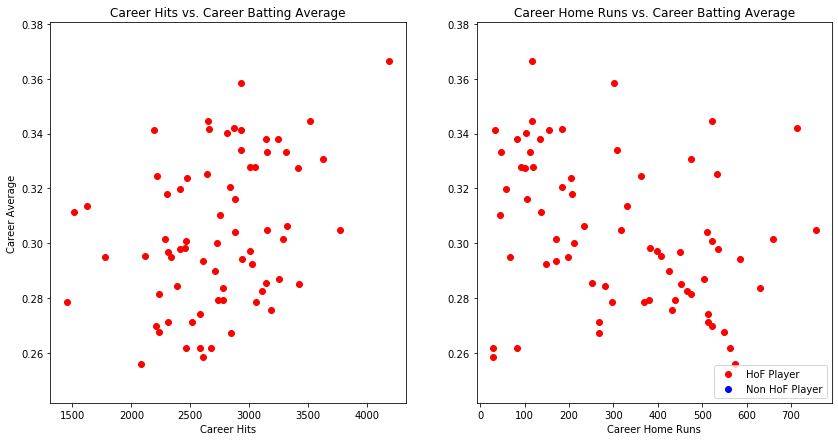

In [32]:
# Filter 'df' for players with 10 or more years of experience
df_10 = df[(df['Years_Played'] >= 10) & (df['HoF'] == 0)]

# Initialize the figure and add subplots
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Create Scatter plots for Hits vs. Average and Home Runs vs. Average
ax1.scatter(df_hof['H'], df_hof['AVE'], c='r', label='HoF Player')
ax1.scatter(df_10['H'], df_10['AVE'], c='b', label='Non HoF Player')
ax1.set_title('Career Hits vs. Career Batting Average')
ax1.set_xlabel('Career Hits')
ax1.set_ylabel('Career Average')
ax2.scatter(df_hof['HR'], df_hof['AVE'], c='r', label='HoF Player')
ax2.scatter(df_10['HR'], df_10['AVE'], c='b', label='Non HoF Player')
ax2.set_title('Career Home Runs vs. Career Batting Average')
ax2.set_xlabel('Career Home Runs')
ax2.legend(loc='lower right', scatterpoints=1)

# Show the plot
plt.show()

In [33]:
# Check for null values
print(df.isnull().sum(axis = 0).tolist())

# Eliminate rows with null values
df = df.dropna()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [35]:
# Create column for years since retirement
df['YSLS'] = 2016 - df['finalYear']

# Filter 'df' for players who retired more than 15 years ago
df_hitters = df[df['YSLS'] > 15]

print(df_hitters.head())

# Filter 'df' for players who retired less than 15 years ago and for currently active players
df_eligible = df[df['YSLS'] <= 15]

print(df_eligible.head())

       playerID nameFirst  nameLast      debut  finalGame     G     AB     R  \
1     aaronha01      Hank     Aaron 1954-04-13 1976-10-03  3298  12364  2174   
398   aparilu01      Luis  Aparicio 1956-04-17 1973-09-28  2601  10230  1335   
405   applilu01      Luke   Appling 1930-09-10 1950-10-01  2422   8856  1319   
714   bankser01     Ernie     Banks 1953-09-17 1971-09-26  2528   9421  1305   
1515  boggswa01      Wade     Boggs 1982-04-10 1999-08-27  2440   9180  1513   

         H   2B  ...  bats_R  throws_R  debutYear  finalYear       AVE  \
1     3771  624  ...       1         1       1954       1976  0.304998   
398   2677  394  ...       1         1       1956       1973  0.261681   
405   2749  440  ...       1         1       1930       1950  0.310411   
714   2583  407  ...       1         1       1953       1971  0.274175   
1515  3010  578  ...       0         1       1982       1999  0.327887   

           OBP  Slug_Percent       OPS  first_aap  YSLS  
1     0.373386  

In [36]:
print(df.columns)

Index(['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'HBP', 'SH', 'SF',
       'Years_Played', 'Af', 'Ef', 'DPf', 'HoF', 'Most Valuable Player',
       'AS_games', 'Gold Glove', 'Rookie of the Year', 'World Series MVP',
       'Silver Slugger', 'G_all', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss',
       'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh', 'pre1920', '1920-41', '1942-45',
       '1946-62', '1963-76', '1977-92', '1993-2009', 'post2009', 'G_p_percent',
       'G_c_percent', 'G_1b_percent', 'G_2b_percent', 'G_3b_percent',
       'G_ss_percent', 'G_lf_percent', 'G_cf_percent', 'G_rf_percent',
       'G_of_percent', 'G_dh_percent', 'pre1920_percent', '1920-41_percent',
       '1942-45_percent', '1946-62_percent', '1963-76_percent',
       '1977-92_percent', '1993-2009_percent', 'post2009_percent', 'bats_R',
       'throws_R', 'debutYear', 'finalYear', 'AVE', 'OBP', 'Slug_Percent',
       'OPS', 'first_a

In [69]:
# Select columns to use for models, and identification columns
num_cols_hitters = ['playerID', 'nameFirst', 'nameLast', 'HoF', 'Years_Played', 'H', 'BB', 'HR', 'AVE', 'OBP', 'Slug_Percent', 'OPS',  'RBI','R', 'SB', '2B', '3B', 'AB', 'SO', 'Most Valuable Player', 'World Series MVP', 'AS_games','Gold Glove', 'Rookie of the Year', 'Silver Slugger', 'bats_R', 'throws_R', 'DPf', 'Af', 'Ef', 'YSLS', 'G_all', '1963-76_percent', '1993-2009_percent', '1946-62_percent', 'G_1b_percent', '1942-45_percent','G_dh_percent', '1920-41_percent', 'G_ss_percent','post2009_percent', '1977-92_percent', 'G_2b_percent', 'G_3b_percent','G_of_percent', 'pre1920_percent', 'first_aap']

# Create a new DataFrame ('data') from the 'df_hitters' using the columns above
data = df_hitters[num_cols_hitters]

# Return the first rows of 'data'
print(data.head())

       playerID nameFirst  nameLast  HoF  Years_Played     H    BB   HR  \
1     aaronha01      Hank     Aaron  1.0            23  3771  1402  755   
398   aparilu01      Luis  Aparicio  1.0            18  2677   736   83   
405   applilu01      Luke   Appling  1.0            20  2749  1302   45   
714   bankser01     Ernie     Banks  1.0            19  2583   763  512   
1515  boggswa01      Wade     Boggs  1.0            18  3010  1412  118   

           AVE       OBP  ...  G_dh_percent  1920-41_percent  G_ss_percent  \
1     0.304998  0.373386  ...      0.060946         0.000000      0.000000   
398   0.261681  0.306322  ...      0.000000         0.000000      0.992695   
405   0.310411  0.396564  ...      0.000000         0.614368      0.915772   
714   0.274175  0.331683  ...      0.000000         0.000000      0.445016   
1515  0.327887  0.413873  ...      0.043852         0.000000      0.000000   

      post2009_percent  1977-92_percent  G_2b_percent  G_3b_percent  \
1        

In [70]:
# Print length of 'data'
print(len(data))

# Print how many Hall of Fame members are in data
print(len(data[data['HoF'] == 1]))

61
61


In [71]:
# Create 'target' Series
target = data['HoF']

# Create 'features' DataFrame
features = data.drop(['playerID', 'nameFirst', 'nameLast', 'HoF', 'first_aap'], axis = 1)

In [72]:
### Logistic Regression

In [73]:
# Import cross_val_predict, KFold and LogisticRegression from 'sklearn'
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model
lr = LogisticRegression(class_weight='balanced')

# Create an instance of the KFold class
kf = KFold(features.shape[0], random_state=1)

# Create predictions using cross validation
predictions_lr = cross_val_predict(lr, features, target, cv=kf)

/Users/brijrajsinhgohil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0

In [61]:
# Import Numpy as np
import numpy as np

# Convert predictions and target to Numpy arrays
np_predictions_lr = np.asarray(predictions_lr)
np_target = target.as_matrix()

NameError: name 'predictions_lr' is not defined

In [74]:
# Determine True Positive Count
tp_filter_lr = (np_predictions_lr == 1) & (np_target == 1)
tp_lr = len(np_predictions_lr[tp_filter_lr])

# Determine False Negative Count
fn_filter_lr = (np_predictions_lr == 0) & (np_target == 1)
fn_lr = len(np_predictions_lr[fn_filter_lr])

# Determine False Positive Count
fp_filter_lr = (np_predictions_lr == 1) & (np_target == 0)
fp_lr = len(np_predictions_lr[fp_filter_lr])

# Determine True Negative Count
tn_filter_lr = (np_predictions_lr == 0) & (np_target == 0)
tn_lr = len(np_predictions_lr[tn_filter_lr])

# Determine True Postive rate
tpr_lr = tp_lr / (tp_lr + fn_lr)

# Determine False Negative Rate
fnr_lr = fn_lr / (fp_lr + tn_lr)

# Print each count
print(tp_lr)
print(fn_lr)
print(fp_lr)

# Print each rate
print(tpr_lr)
print(fnr_lr)
print(fpr_lr)

NameError: name 'np_predictions_lr' is not defined

In [75]:
### Random Forest

In [77]:
# Import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Create penalty dictionary
penalty = {
    0: 100,
    1: 1
}

# Create Random Forest Model
rf = RandomForestClassifier(random_state = 1, n_estimators = 12, max_depth = 11, min_samples_leaf = 1, class_weight = penalty)

# Create predictions using cross_validation
predictions_rf = cross_val_predict(rf, features, target, cv = kf)

# Convert predictions to Numpy array
np_predictions_rf = np.asarray(predictions_rf)

ValueError: Class label 0 not present.

In [78]:
# Determine True Positive count
tp_filter_rf = (np_predictions_rf == 1) & (np_target == 1)
tp_rf = len(np_predictions_rf[tp_filter_rf])

# Determine False Negative count
fn_filter_rf = (np_predictions_rf == 0) & (np_target == 1)
fn_rf = len(np_predictions_rf[fn_filter_rf])

# Determine False Positive count
fp_filter_rf = (np_predictions_rf == 1) & (np_target == 0)
fp_rf = len(np_predictions_rf[fp_filter_rf])

# Determine True Negative count
tn_filter_rf = (np_predictions_rf == 0) & (np_target == 0)
tn_rf = len(np_predictions_rf[tn_filter_rf])

# Determine True Positive rate
tpr_rf = tp_rf / (tp_rf + fn_rf)

# Determine False Negative rate
fnr_rf = fn_rf / (fn_rf + tp_rf)

# Determine False Positive rate
fpr_rf = fp_rf / (fp_rf + tn_rf)

# Print each count
print(tp_rf)
print(fn_rf)
print(fp_rf)

# Print each rate
print(tpr_rf)
print(fnr_rf)
print(fpr_rf)

NameError: name 'np_predictions_rf' is not defined

In [79]:
# Create a new DataFrame from 'df_eligible' using 'num_col_hitters'
new_data = df_eligible[num_cols_hitters]

# Create a new features DataFrame
new_features = new_data.drop(['playerID', 'nameFirst', 'nameLast', 'HoF'], axis = 1)

In [80]:
# Fit the Random Forest Model
rf.fit(features, target)

# Estimate probabilities of Hall of Fame induction
probabilities = rf.predict_proba(new_features)

ValueError: Class label 0 not present.

In [81]:
# Convert predictions to a DataFrame
hof_predictions = pd.DataFrame(probabilities[:, 1])

# Sort the DataFrame (descending)
hof_predictions = hof_predictions.sort_values(0, ascending = False)

hof_predictions['Probability'] = hof_predictions[0]

# Print 50 highest probability HoF inductees from still eligible players
for i, row in hof_predictions.head(50).iterrows():
    prob = ' '.join(('HoF Probability = ', str(row['Probability'])))
    print('')
    print(prob)
    print(new_data.iloc[i, 1:27])

NameError: name 'probabilities' is not defined

In [82]:
# It can be observed that in this tutorial 
# there are lot of missing steps
# which is making it hard to implement.
# The class labels were not defined
# there was only one class label 1.0